In [77]:
import time
import datetime
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from pandas import DataFrame

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error,accuracy_score,roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier

warnings.filterwarnings(action='ignore') 
#warnings.filterwarnings(action='default')

In [78]:
circuits = pd.read_csv('./data/circuits.csv')
con_res = pd.read_csv('./data/constructor_results.csv')
con_std = pd.read_csv('./data/constructor_standings.csv')
con = pd.read_csv('./data/constructors.csv')

dri_std = pd.read_csv('./data/driver_standings.csv')
dri = pd.read_csv('./data/drivers.csv') #필요 없음

lap_times = pd.read_csv('./data/lap_times.csv')
pit_stops = pd.read_csv('./data/pit_stops.csv')
qualify = pd.read_csv(r'./data/qualifying.csv') # \N 이 유니코드로 인식되는데 이것을 방지하기 위해 앞에 r을 붙임
races = pd.read_csv('./data/races.csv')
results = pd.read_csv('./data/results.csv')
seasons = pd.read_csv('./data/seasons.csv')
status = pd.read_csv('./data/status.csv')


In [79]:
#데이터 이해
print('circuits : ')
#print(circuits.columns,'\n')
display(circuits) #서클에 대한 정보이므로 승부예측에 필요없는 정보

print('con_res : ')
#print(con_res.columns,'\n')
display(con_res) #경기별 업체 결과 정보

print('con_std : ')
#print(con_std.columns,'\n')
display(con_std) #업체별 이력

print('con : ')
#print(con.columns,'\n')
display(con) #업체별 정보

print('dri_std : ')
#print(dri_std.columns,'\n')
display(dri_std) #드라이버의 이력

print('dri : ')
#print(dri.columns,'\n')
display(dri) #드라이버별 정보 

print('lap_times : ')
#print(lap_times.columns,'\n')
display(lap_times) #매 경기 별 랩 타임에 대한 정보

print('pit_stops : ')
#print(pit_stops.columns,'\n')
display(pit_stops) #매 경기 별 피트스탑에 대한정보

print('qualify : ')
#print(qualify.columns,'\n')
display(qualify) # 본 race에서의 grid를 정하는 데이터

print('races : ')
#print(races.columns,'\n')
display(races) # 년도별 라운드 정보

print('results : ')
#print(results.columns,'\n')
display(results) # 매 경기 라운드별 각 주행 선수들의 정보

print('seasons : ')
#print(seasons.columns,'\n')
display(seasons) # 시즌별 정보

print('status : ')
#print(status.columns,'\n')
display(status) # 매 경기 별 랩타임에 대한 정보

circuits : 


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,73,BAK,Baku City Circuit,Baku,Azerbaijan,40.37250,49.85330,-7,http://en.wikipedia.org/wiki/Baku_City_Circuit
73,74,hanoi,Hanoi Street Circuit,Hanoi,Vietnam,21.01660,105.76600,9,http://en.wikipedia.org/wiki/Hanoi_Street_Circuit
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit


con_res : 


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
11765,16265,1055,213,1.0,\N
11766,16266,1055,117,0.0,\N
11767,16267,1055,51,0.0,\N
11768,16268,1055,3,0.0,\N


con_std : 


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
12531,27728,1055,117,5.0,7,7,0
12532,27729,1055,51,0.0,8,8,0
12533,27730,1055,214,15.0,5,5,0
12534,27731,1055,3,0.0,9,9,0


con : 


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


dri_std : 


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33020,70346,1055,854,0.0,18,18,0
33021,70347,1055,842,8.0,10,10,0
33022,70348,1055,849,0.0,19,19,0
33023,70349,1055,4,5.0,12,12,0


dri : 


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


lap_times : 


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
495539,1055,853,60,19,1:27.116,87116
495540,1055,853,61,19,1:30.047,90047
495541,1055,853,62,19,1:27.399,87399
495542,1055,853,63,19,1:24.739,84739


pit_stops : 


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8218,1055,822,2,53,16:18:52,21.638,21638
8219,1055,815,2,57,16:24:55,21.345,21345
8220,1055,844,2,58,16:26:05,22.292,22292
8221,1055,830,2,60,16:28:18,21.592,21592


qualify : 


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
8769,8810,1055,852,213,22,16,1:18.556,\N,\N
8770,8811,1055,8,51,7,17,1:18.917,\N,\N
8771,8812,1055,854,210,47,18,1:19.117,\N,\N
8772,8813,1055,849,3,6,19,1:19.219,\N,\N


races : 


,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1053,1069,2021,18,69,United States Grand Prix,2021-10-24,19:00:00,http://en.wikipedia.org/wiki/2021_United_State...
1054,1070,2021,19,32,Mexico City Grand Prix,2021-10-31,19:00:00,http://en.wikipedia.org/wiki/2021_Mexican_Gran...
1055,1071,2021,20,18,Brazilian Grand Prix,2021-11-07,17:00:00,http://en.wikipedia.org/wiki/2021_Brazilian_Gr...
1056,1072,2021,22,77,Saudi Arabian Grand Prix,2021-12-05,16:00:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...


results : 


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25035,25041,1055,849,3,6,19,16,16,16,0.0,65,\N,\N,57,16,1:22.905,203.003,11
25036,25042,1055,4,214,14,10,17,17,17,0.0,65,\N,\N,63,6,1:21.182,207.311,11
25037,25043,1055,854,210,47,18,18,18,18,0.0,64,\N,\N,54,12,1:22.637,203.661,12
25038,25044,1055,853,210,9,20,19,19,19,0.0,64,\N,\N,45,19,1:24.040,200.261,12


seasons : 


,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...
...,...,...
67,2017,https://en.wikipedia.org/wiki/2017_Formula_One...
68,2018,https://en.wikipedia.org/wiki/2018_Formula_One...
69,2019,https://en.wikipedia.org/wiki/2019_Formula_One...
70,2020,https://en.wikipedia.org/wiki/2020_Formula_One...


status : 


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
132,135,Brake duct
133,136,Seat
134,137,Damage
135,138,Debris


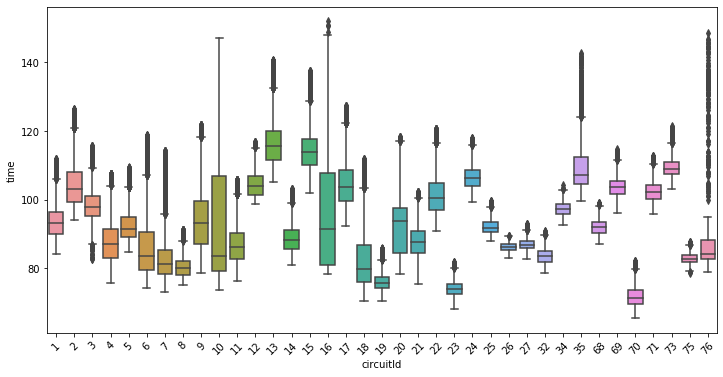

In [80]:
# 서클별 랩타임 박스 플랏 그리기
import seaborn as sns

a =  pd.merge(races, results, how='left',on=['raceId'] )
a = a.iloc[:,[0,3]]
b = pd.merge(lap_times, a, how='left', on=['raceId'])
#b = b.dropna(subset=['circuitId','time'])

b = b.iloc[:,[4,6]]
b = b.drop_duplicates()


def func_1(x):
    if str(x) == '00.000':
        return 0
    elif len(x) == 12:
        return float(str(x).split(':')[2]) + (60 * float(str(x).split(':')[1])) + (60 * 60 * float(str(x).split(':')[0]))
    elif len(x) == 11:
        return float(str(x).split(':')[2]) + (60 * float(str(x).split(':')[1])) + (60 * 60 * float(str(x).split(':')[0]))
    elif len(x) == 9:
        return float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0]))
    elif len(x) == 8:
        return float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0]))
    else:
        return float(str(x))
    
def removeOutlier(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    
    iqt = 1.5 * (q3 - q1)
    y = x
    
    y['time'][(x['time'] > (q3 + iqt)) | (x['time'] < (q1 - iqt))] = None
    y['time']
    return (y)

def delete_outliers(df, time, circuitId): # delete_outliers(b, 'time', 'circuitId')
    outlier_indices = []
    
    for i in df[circuitId].drop_duplicates().values:
        df = b[b[circuitId] == i]

        Q1 = np.percentile(df[time], 25) 
        Q3 = np.percentile(df[time], 75) 
        
        IQR = Q3 - Q1 
        
        outlier_step = 1.5 * IQR 
        
        outlier_list_col = df[(df[time] < (Q1 - outlier_step)) | (df[time] > (Q3 + outlier_step))].index
  
        outlier_indices.extend(outlier_list_col)
    return outlier_indices

# for i in b['circuitId'].drop_duplicates().index
# b = 202767행

b['time'] = list(map(func_1, b.time))
c = delete_outliers(b, 'time', 'circuitId')

b = b.drop(c,axis=0)


#b = removeOutlier(b, 'time')
#b

plt.figure(figsize=(12,6))
sns.boxplot(data=b, x='circuitId', y='time' )
plt.xticks(rotation=45)
plt.show()

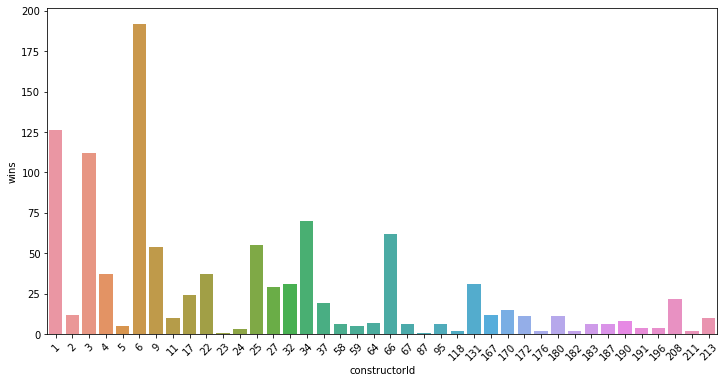

In [81]:
#constructor 별 우승 횟수에 대한 막대그래프 그리기

bar_plot_con_std = con_std[con_std['wins'] == 1]
a = bar_plot_con_std.groupby('constructorId').sum()
#a.head()
#a.index

plt.figure(figsize=(12,6))
sns.barplot(data=a, x=a.index, y='wins' )
plt.xticks(rotation=45)
plt.show()

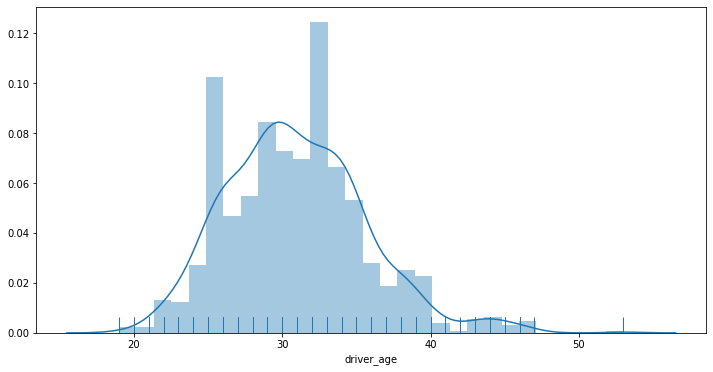

In [82]:
#드라이버 age 별 우승 횟수 히스토그램 distplot
#ar_plot_con_std = con_std[con_std['wins'] == 1]

driver_age = pd.merge(races, results, how='left',on='raceId')
driver_age = pd.merge(driver_age, dri, how='left',on=['driverId'])
driver_age = driver_age[driver_age.positionOrder == 1]
driver_age = driver_age.loc[:,['year','driverId','dob','positionOrder']]
driver_age = driver_age.dropna()
driver_age.loc[:,'dob'] = pd.to_datetime(driver_age['dob'] , format='%Y-%m-%d')
driver_age.loc[:,'dob_year'] = pd.DataFrame(driver_age['dob'])['dob'].dt.year
driver_age.loc[:,'driver_age'] = driver_age['year'] - driver_age['dob_year']
driver_age = driver_age.drop(['dob','dob_year'], axis = 1)
driver_age

plt.figure(figsize=(12,6))
sns.distplot(driver_age['driver_age'], kde=True, rug=True)
plt.show()


<Figure size 1008x432 with 0 Axes>

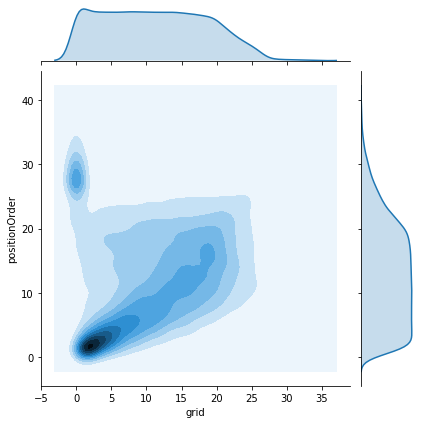

In [83]:
#grid와 순위와의 상관관계

plt.figure(figsize=(14,6))
#a = results[results.positionOrder == 1]
sns.jointplot(x='grid', y='positionOrder', data=results, kind='kde')
plt.show()

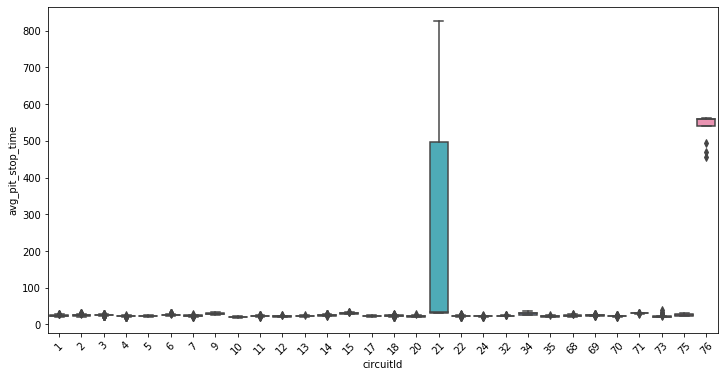

In [84]:
#avg_pit_stop_time과 우승 횟수에 대한 distplot

def func(x):
    if str(x) == '00.000':
        return 0
    elif len(x) == 9:
        return float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0]))
    elif len(x) == 8:
        return float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0]))
    else:
        return float(str(x))
    
displot_ps = pit_stops
displot_ps = displot_ps.drop('time',axis=1)

a = list(map(func, displot_ps.duration))

displot_ps['milliseconds'] = displot_ps['milliseconds'].astype('str')
displot_ps['duration'] = a
displot_ps['duration'] = displot_ps['duration'].astype('str')
displot_ps['avg_pit_stop_time'] = displot_ps['duration'] + displot_ps['milliseconds']
displot_ps['avg_pit_stop_time'] = displot_ps['avg_pit_stop_time'].astype('float')
displot_ps = displot_ps.drop(['duration','milliseconds'], axis=1)
displot_ps = displot_ps.groupby(['raceId','driverId']).mean()

displot_ps = pd.merge(results,displot_ps,how='left', on=['raceId','driverId'])
displot_ps = pd.merge(races,displot_ps,how='left', on=['raceId'])
displot_ps = displot_ps.loc[:,['circuitId','avg_pit_stop_time']].dropna()
b = displot_ps

# 서클별 랩타임 박스 플랏 그리기

def delete_outliers(df, time, circuitId): 
    outlier_indices = []
    
    for i in df[circuitId].drop_duplicates().values:
        df = b[b[circuitId] == i]

        Q1 = np.percentile(df[time], 25) 
        Q3 = np.percentile(df[time], 75) 
        
        IQR = Q3 - Q1 
        
        outlier_step = 1.5 * IQR 
        
        outlier_list_col = df[(df[time] < (Q1 - outlier_step)) | (df[time] > (Q3 + outlier_step))].index
  
        outlier_indices.extend(outlier_list_col)
    return outlier_indices

c = delete_outliers(displot_ps, 'avg_pit_stop_time', 'circuitId')

displot_ps = displot_ps.drop(c,axis=0)

plt.figure(figsize=(12,6))
sns.boxplot(data=displot_ps, x='circuitId', y='avg_pit_stop_time' )
plt.xticks(rotation=45)
plt.show()



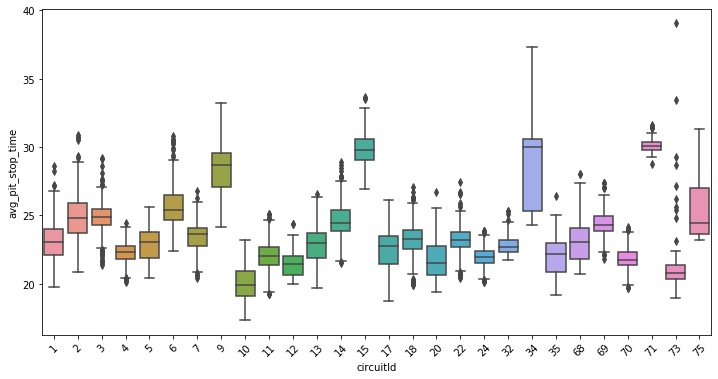

In [85]:
a = displot_ps[displot_ps['circuitId'] != 21]
d = a[a['circuitId'] != 76]

plt.figure(figsize=(12,6))
sns.boxplot(data=d, x='circuitId', y='avg_pit_stop_time' )
plt.xticks(rotation=45)
plt.show()


In [86]:

'''
lambda x: 0 if str(x) == '00.000'  else(
    float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0])) 
    if x != 0 else 0)
'''
def func(x):
    if str(x) == '00.000':
        return 0
    elif len(x) == 9:
        return float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0]))
    elif len(x) == 8:
        return float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0]))
    else:
        return float(str(x))
    
df_ps = pit_stops

#df_ps = df_ps.drop(df_ps.loc[df_ps['duration'] == 'nan'].index)

df_ps = df_ps.drop('time',axis=1)

a = list(map(func, df_ps.duration))

'''
df_ps.duration.map(lambda x: 
                   0 if str(x) == '00.000' 
                   else (float(str(x)) if len(x) == 6 
                         else(float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0])) if len(x) == 9 
                              else (float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0])) if len(x) == 1 else 0))))
'''
df_ps['milliseconds'] = df_ps['milliseconds'].astype('str')
df_ps['duration'] = a
df_ps['duration'] = df_ps['duration'].astype('str')
#df_ps.iloc[751,:]
df_ps['avg_pit_stop_time'] = df_ps['duration'] + df_ps['milliseconds']
df_ps['avg_pit_stop_time'] = df_ps['avg_pit_stop_time'].astype('float')
df_ps = df_ps.drop(['duration','milliseconds'], axis=1)
final_df_ps = df_ps.groupby(['raceId','driverId']).mean()
final_df_ps

stop        lap  avg_pit_stop_time
raceId driverId                                    
841    1          1.5  26.000000          23.213232
       2          1.5  22.500000          24.046240
       3          1.0  16.000000          23.716237
       4          2.0  27.000000          24.055241
       5          1.0  17.000000          24.865249
...               ...        ...                ...
1055   846        1.5  37.000000          22.165722
       847        1.5  18.500000          22.866729
       849        2.0  28.666667          23.500568
       853        1.5  32.000000          22.800228
       854        1.5  36.500000          23.159236

[3970 rows x 3 columns]

In [87]:
def func_1(x):
    if str(x) == '00.000':
        return 0
    elif len(x) == 12:
        return float(str(x).split(':')[2]) + (60 * float(str(x).split(':')[1])) + (60 * 60 * float(str(x).split(':')[0]))
    elif len(x) == 11:
        return float(str(x).split(':')[2]) + (60 * float(str(x).split(':')[1])) + (60 * 60 * float(str(x).split(':')[0]))
    elif len(x) == 9:
        return float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0]))
    elif len(x) == 8:
        return float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0]))
    else:
        return float(str(x))
    

df_lp = lap_times

b = list(map(func_1, df_lp.time))

df_lp['milliseconds'] = df_lp['milliseconds'].astype('str')
df_lp['time'] = b
df_lp['time'] = df_lp['time'].astype('str')

df_lp['avg_lap_times'] = df_lp['time'] + df_lp['milliseconds']
df_lp['avg_lap_times'] = df_lp['avg_lap_times'].astype('float')
df_lp = df_lp.drop(['time','milliseconds'], axis=1)
final_df_lp = df_lp.groupby(['raceId','driverId']).mean()
final_df_lp


lap   position  avg_lap_times
raceId driverId                                
1      1         29.5   9.672414      97.566318
       2         29.5  15.327586      97.637476
       3         29.5   6.586207      97.614675
       4         29.5   9.603448      97.598737
       6          9.0   6.647059      91.822990
...               ...        ...            ...
1055   847       33.0  13.430769      86.869897
       849       33.0  15.753846      87.046746
       852        3.5  16.833333      88.198683
       853       32.5  18.890625      88.145758
       854       32.5  17.250000      87.368153

[9368 rows x 3 columns]

In [88]:
drop_col = ['name','date','time_x','url','number','position','points','time_y',\
            'milliseconds','fastestLap','fastestLapTime','fastestLapSpeed']
driver = dri.iloc[:,[0,6]]
df1 = pd.merge(races, results, how='left',on=['raceId'] ).drop(drop_col,axis=1)
df2 = pd.merge(df1,driver,how='inner', on=['driverId']) #dob 를 age로 변경
df3 = pd.merge(df2,final_df_ps,how='left', on=['raceId','driverId'])
df4 = pd.merge(df3,final_df_lp,how='left', on=['raceId','driverId']) #행수 25040
df5 = df4.dropna(subset=['avg_pit_stop_time','avg_lap_times']) #행수 3970개
df5

,raceId,year,round,circuitId,resultId,driverId,constructorId,grid,positionText,positionOrder,laps,rank,statusId,dob,stop,lap_x,avg_pit_stop_time,lap_y,position,avg_lap_times
191,841,2011,1,1,20784.0,18.0,1.0,4.0,6,6.0,58.0,5,1.0,1980-01-19,2.0,24.333333,20.950543,29.5,6.448276,93.527760
192,842,2011,2,2,20802.0,18.0,1.0,4.0,2,2.0,56.0,4,1.0,1980-01-19,2.0,24.666667,22.458950,28.5,3.410714,104.698240
193,843,2011,3,17,20828.0,18.0,1.0,2.0,4,4.0,56.0,3,1.0,1980-01-19,2.0,25.000000,21.924886,28.5,3.321429,104.075626
194,844,2011,4,5,20854.0,18.0,1.0,6.0,6,6.0,58.0,13,1.0,1980-01-19,2.0,26.000000,21.808218,29.5,5.344828,94.433798
195,845,2011,5,4,20875.0,18.0,1.0,5.0,3,3.0,66.0,7,1.0,1980-01-19,2.0,30.666667,20.295203,33.5,4.696970,90.592502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25034,1054,2021,3,75,25022.0,854.0,210.0,19.0,17,17.0,64.0,17,12.0,1999-03-22,2.0,12.333333,23.572902,32.5,17.484375,88.733589
25035,1055,2021,4,4,25043.0,854.0,210.0,18.0,18,18.0,64.0,12,12.0,1999-03-22,1.5,36.500000,23.159236,32.5,17.250000,87.368153
25036,1053,2021,2,21,25002.0,853.0,210.0,19.0,17,17.0,61.0,17,12.0,1999-03-02,2.5,24.500000,399.645864,31.0,17.688525,121.719952
25038,1054,2021,3,75,25024.0,853.0,210.0,20.0,19,19.0,64.0,19,12.0,1999-03-02,2.5,19.750000,24.236742,32.5,18.750000,89.710233


In [89]:
df6 = df5
df6.loc[:,'dob'] = pd.to_datetime(df6['dob'] , format='%Y-%m-%d')
df6.loc[:,'dob_year'] = pd.DataFrame(df6['dob'])['dob'].dt.year
df6.loc[:,'driver_age'] = df6['year'] - df6['dob_year']
df7 = df6.drop(['dob','dob_year'], axis = 1)

final_drop_col = ['raceId','round','resultId','positionText','laps','rank','stop','lap_x','lap_y','position','statusId']
final_df = df7.drop(final_drop_col,axis=1)
final_df[['driverId','constructorId','grid','positionOrder','year']] = final_df[['driverId','constructorId','grid','positionOrder','year']].astype('int')
final_df

,year,circuitId,driverId,constructorId,grid,positionOrder,avg_pit_stop_time,avg_lap_times,driver_age
191,2011,1,18,1,4,6,20.950543,93.527760,31
192,2011,2,18,1,4,2,22.458950,104.698240,31
193,2011,17,18,1,2,4,21.924886,104.075626,31
194,2011,5,18,1,6,6,21.808218,94.433798,31
195,2011,4,18,1,5,3,20.295203,90.592502,31
...,...,...,...,...,...,...,...,...,...
25034,2021,75,854,210,19,17,23.572902,88.733589,22
25035,2021,4,854,210,18,18,23.159236,87.368153,22
25036,2021,21,853,210,19,17,399.645864,121.719952,22
25038,2021,75,853,210,20,19,24.236742,89.710233,22


In [90]:
final_df_1 = final_df
final_df_1['positionOrder'] = final_df.positionOrder.map(lambda x: 0 if x != 1 else x)
final_df_1

,year,circuitId,driverId,constructorId,grid,positionOrder,avg_pit_stop_time,avg_lap_times,driver_age
191,2011,1,18,1,4,0,20.950543,93.527760,31
192,2011,2,18,1,4,0,22.458950,104.698240,31
193,2011,17,18,1,2,0,21.924886,104.075626,31
194,2011,5,18,1,6,0,21.808218,94.433798,31
195,2011,4,18,1,5,0,20.295203,90.592502,31
...,...,...,...,...,...,...,...,...,...
25034,2021,75,854,210,19,0,23.572902,88.733589,22
25035,2021,4,854,210,18,0,23.159236,87.368153,22
25036,2021,21,853,210,19,0,399.645864,121.719952,22
25038,2021,75,853,210,20,0,24.236742,89.710233,22


In [91]:
final_df.sort_values(['year','circuitId','driverId'])

,year,circuitId,driverId,constructorId,grid,positionOrder,avg_pit_stop_time,avg_lap_times,driver_age
3565,2011,1,1,1,2,0,23.213232,92.981093,26
1893,2011,1,2,4,18,0,24.046240,95.507849,34
1393,2011,1,3,131,7,0,23.716237,96.454300,26
1145,2011,1,4,6,5,0,24.055241,93.142509,30
3453,2011,1,5,205,19,0,24.865249,98.761569,30
...,...,...,...,...,...,...,...,...,...
25002,2021,75,847,3,11,0,24.376910,88.299342,23
25023,2021,75,849,3,18,0,23.433212,88.781527,26
25030,2021,75,852,213,14,0,23.670237,87.640257,21
25038,2021,75,853,210,20,0,24.236742,89.710233,22


In [92]:



scaler = StandardScaler()

#X = final_df.drop(['positionOrder','year'],axis=1)
#y = final_df.positionOrder

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=111)

#scaler.fit(X_train)
#X_train_std = scaler.transform(X_train)
#X_test_std = scaler.transform(X_test)



train = final_df[final_df.year < 2020]
test = final_df[final_df.year == 2020]

X_train = train.drop(['positionOrder','year'],axis=1)
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
y_train = train.positionOrder

X_test = test.drop(['positionOrder','year'],axis=1)
X_test_std = scaler.transform(X_test)
y_test = test.positionOrder

#model = RandomForestRegressor(n_estimators=100, random_state = 111) # 0.422867979416793
#model = LinearRegression(fit_intercept = True)
#model = LogisticRegression( solver = 'liblinear',multi_class='auto', C= 100, max_iter=100)           #0.11182108626198083
#model = MLPRegressor(hidden_layer_sizes = [20,40],activation = 'relu', solver = 'sgd', alpha = 0.1, random_state = 1)

#매 라운드 마다 예측이므로 classifier 사용
#model = svm.SVC(probability = False, gamma = 0.1, C = 0.1, kernel = 'poly' ) #0.09
model = MLPClassifier(hidden_layer_sizes = (80,70,35,10), activation = 'relu', solver = 'adam', alpha = 0.3, random_state = 111)
#(80, 70, 35,10), 'relu', 'adam', 0.3 -> 0.67
#model = DecisionTreeClassifier(max_depth= 30)   #0.11 
#model = RandomForestClassifier(n_estimators=150, random_state = 111)


model.fit(X_train_std, y_train)

y_pred = model.predict(X_test_std)
print('confusion_matrix : \n',confusion_matrix(y_test, y_pred)) #가로 예측 (0,1), 세로 실제(0,1)
print('\nclassification_report : \n',classification_report(y_test, y_pred))
print('\naccuracy_score : \n',accuracy_score(y_test, y_pred))

#y_pred = model.predict(X_test_std)
#print(mean_squared_error(y_test, y_pred))
#print(model.score(X_test_std, y_test))
#scores = cross_val_score(model, X_test_std, y_test, cv=5)
#print(scores)

confusion_matrix : 
 [[291   5]
 [  6  11]]

classification_report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       296
           1       0.69      0.65      0.67        17

    accuracy                           0.96       313
   macro avg       0.83      0.82      0.82       313
weighted avg       0.96      0.96      0.96       313


accuracy_score : 
 0.9648562300319489


In [93]:
prediction_df = pd.DataFrame(model.predict_proba(X_test_std), columns = ['proba_0','proba_1'])
prediction_df[prediction_df['proba_0'] <= prediction_df['proba_1']]

,proba_0,proba_1
33,0.415472,0.584528
34,0.290462,0.709538
35,0.360497,0.639503
36,0.414941,0.585059
37,0.311773,0.688227
38,0.408623,0.591377
39,0.387470,0.612530
40,0.417925,0.582075
41,0.322045,0.677955
42,0.368055,0.631945


In [94]:
df_ps
#df_ps.groupby(['raceId','driverId']).sum()
#pit_stops.groupby(['raceId','driverId']).sum()

len(lap_times.iloc[7916,4]) #2:05:05.152
#lap_times = lap_times.drop(7916, axis=0)
#lap_times[lap_times['time'] == '2:05:05.152']
#lap_times[lap_times['raceId'] == 847]
#lap_times[lap_times['time'] == '2:05:06.656']
#lap_times = lap_times.drop(8020, axis=0)

#df_ps = pit_stops
#len('16:44.718') 751행
#df_ps[df_ps.duration == 'nan']
#df_ps.loc[df_ps['duration'] == 'nan'].index
#pit_stops

8